SOME DATA ANALYSIS MADE TO DATASET XP1'

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt
import tensorflow as tf
training_dataframe=pd.read_csv('/content/drive/My Drive/identify_pneumonia-master/training_df.csv')

In [0]:
x=np.load('/content/drive/My Drive/identify_pneumonia-master/colab_Data/x_test_200.npy')

In [0]:
detailedinfo=pd.read_csv('/content/drive/My Drive/identify_pneumonia-master/stage_2_detailed_class_info.csv')

In [0]:
training_dataframe2 = training_dataframe.set_index('patientId').join(detailedinfo.set_index('patientId'))

In [0]:
training_dataframe2=training_dataframe2.drop_duplicates()

In [0]:
del training_dataframe2['Unnamed: 0']

In [0]:
training_dataframe.loc[training_dataframe['patientId']=='71a747b4-d566-4590-8a69-4176501f6884']

,Unnamed: 0,patientId,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,Target
10424,10424,71a747b4-d566-4590-8a69-4176501f6884,CR,59,F,CHEST,AP,WSD,1024,1024,"['0.168', '0.168']",1


In [0]:
training_dataframe2 = training_dataframe2.rename_axis('patientId').reset_index()

In [0]:
training_dataframe2.loc[(training_dataframe2['PatientAge'] < 18),  'AgeGroup'] = 'Young (<18)'
training_dataframe2.loc[(training_dataframe2['PatientAge'] >= 18),  'AgeGroup'] = 'Adult (18-64)'
training_dataframe2.loc[(training_dataframe2['PatientAge'] >=65),  'AgeGroup'] = 'Elderly (>64)'

In [0]:
training_dataframe2.loc[training_dataframe2['class']=='No Lung Opacity / Not Normal']

,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,Target,class
patientId,,,,,,,,,,,
0004cfab-14fd-4e49-80ba-63a80b6bddd6,CR,51,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,No Lung Opacity / Not Normal
00313ee0-9eaa-42f4-b0ab-c148ed3241cd,CR,48,F,CHEST,PA,WSD,1024,1024,"['0.19431099999999998', '0.19431099999999998']",0,No Lung Opacity / Not Normal
00322d4d-1c29-4943-afc9-b6754be640eb,CR,19,M,CHEST,AP,WSD,1024,1024,"['0.168', '0.168']",0,No Lung Opacity / Not Normal
0049f7b2-229b-4a46-91a3-0e321a3ca80a,CR,26,M,CHEST,AP,WSD,1024,1024,"['0.168', '0.168']",0,No Lung Opacity / Not Normal
00569f44-917d-4c86-a842-81832af98c30,CR,54,M,CHEST,AP,WSD,1024,1024,"['0.139', '0.139']",0,No Lung Opacity / Not Normal
...,...,...,...,...,...,...,...,...,...,...,...
fff1cc9c-3895-43be-84e1-a7aaef21002b,CR,58,F,CHEST,PA,WSD,1024,1024,"['0.168', '0.168']",0,No Lung Opacity / Not Normal
fff7447f-99ce-4102-87f3-9788b2459eb4,CR,67,M,CHEST,PA,WSD,1024,1024,"['0.168', '0.168']",0,No Lung Opacity / Not Normal
fffc95b5-605b-4226-80ab-62caec682b22,CR,30,F,CHEST,AP,WSD,1024,1024,"['0.139', '0.139']",0,No Lung Opacity / Not Normal


In [0]:
x=training_dataframe2.loc[training_dataframe2['class']=='Lung Opacity']

In [0]:
xx=training_dataframe2.loc[training_dataframe2['PatientAge']>95]

In [0]:
xx

,patientId,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,Target,class,AgeGroup
4115,3b8b8777-a1f6-4384-872a-28b95f59bf0d,CR,148,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Elderly (>64)
10648,73aeea88-fc48-4030-8564-0a9d7fdecac4,CR,151,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,No Lung Opacity / Not Normal,Elderly (>64)
16213,a4e8e96d-93a6-4251-b617-91382e610fab,CR,153,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,No Lung Opacity / Not Normal,Elderly (>64)
24374,ec3697bd-184e-44ba-9688-ff8d5fbf9bbc,CR,150,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Elderly (>64)
25537,f632328d-5819-4b29-b54f-adf4934bbee6,CR,155,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Elderly (>64)


In [0]:
just_N_P=training_dataframe2.loc[training_dataframe2['class']!='No Lung Opacity / Not Normal']  #select only the two classes used on the work (Normal and Lung opacity)

In [0]:
just_N_P

,patientId,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,Target,class,AgeGroup
1,000924cf-0f8d-42bd-9158-1af53881a557,CR,19,F,CHEST,AP,WSD,1024,1024,"['0.139', '0.139']",0,Normal,Adult (18-64)
2,000db696-cf54-4385-b10b-6b16fbb3f985,CR,25,F,CHEST,AP,WSD,1024,1024,"['0.168', '0.168']",1,Lung Opacity,Adult (18-64)
3,000fe35a-2649-43d4-b027-e67796d412e0,CR,40,M,CHEST,AP,WSD,1024,1024,"['0.171', '0.171']",1,Lung Opacity,Adult (18-64)
4,001031d9-f904-4a23-b3e5-2c088acd19c6,CR,57,M,CHEST,PA,WSD,1024,1024,"['0.139', '0.139']",1,Lung Opacity,Adult (18-64)
5,0010f549-b242-4e94-87a8-57d79de215fc,CR,56,M,CHEST,PA,WSD,1024,1024,"['0.19431099999999998', '0.19431099999999998']",0,Normal,Adult (18-64)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26669,ffe16061-b19f-4333-8a03-b41aab42b47d,CR,42,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)
26675,fff0b503-72a5-446a-843d-f3d152e39053,CR,62,M,CHEST,AP,WSD,1024,1024,"['0.168', '0.168']",1,Lung Opacity,Adult (18-64)
26677,fff50447-821b-4b72-ae91-22b0679d6d3e,CR,41,M,CHEST,AP,WSD,1024,1024,"['0.139', '0.139']",0,Normal,Adult (18-64)
26679,fffb2395-8edd-4954-8a89-ffe2fd329be3,CR,46,M,CHEST,AP,WSD,1024,1024,"['0.168', '0.168']",1,Lung Opacity,Adult (18-64)


In [0]:
just_PA_and_N_P=just_N_P.loc[just_N_P['ViewPosition']=='PA']

In [0]:
just_PA_and_N_P

,patientId,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,Target,class,AgeGroup
4,001031d9-f904-4a23-b3e5-2c088acd19c6,CR,57,M,CHEST,PA,WSD,1024,1024,"['0.139', '0.139']",1,Lung Opacity,Adult (18-64)
5,0010f549-b242-4e94-87a8-57d79de215fc,CR,56,M,CHEST,PA,WSD,1024,1024,"['0.19431099999999998', '0.19431099999999998']",0,Normal,Adult (18-64)
8,0022995a-45eb-4cfa-9a59-cd15f5196c64,CR,54,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)
9,0025d2de-bd78-4d36-9f72-e15a5e22ca82,CR,28,F,CHEST,PA,WSD,1024,1024,"['0.171', '0.171']",0,Normal,Adult (18-64)
10,00293de0-a530-41dc-9621-0b3def01d06d,CR,63,F,CHEST,PA,WSD,1024,1024,"['0.139', '0.139']",0,Normal,Adult (18-64)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26657,ffcc35e8-6fe8-42df-9605-9fedf57240d1,CR,71,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Elderly (>64)
26661,ffd56560-6754-4a20-83c6-06ad5c4b30ab,CR,50,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)
26665,ffdc8a6a-f513-4a04-9c1d-24840a779220,CR,56,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)
26669,ffe16061-b19f-4333-8a03-b41aab42b47d,CR,42,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)


In [0]:
df = just_PA_and_N_P 

In [0]:
df.loc[(df['Target'] == '0'),  'Label'] == '0'
df.loc[(df['Target'] == '1'),  'Label'] == '1'

In [0]:
df=df.rename(columns={'Target': 'Label'})

In [0]:
del df['Modality']

In [0]:
df

,patientId,PatientAge,PatientSex,BodyPartExamined,ViewPosition,Label,AgeGroup,Condition
4,001031d9-f904-4a23-b3e5-2c088acd19c6,57,M,CHEST,PA,1,Adult (18-64),Pneumonia
5,0010f549-b242-4e94-87a8-57d79de215fc,56,M,CHEST,PA,0,Adult (18-64),Normal
8,0022995a-45eb-4cfa-9a59-cd15f5196c64,54,M,CHEST,PA,0,Adult (18-64),Normal
9,0025d2de-bd78-4d36-9f72-e15a5e22ca82,28,F,CHEST,PA,0,Adult (18-64),Normal
10,00293de0-a530-41dc-9621-0b3def01d06d,63,F,CHEST,PA,0,Adult (18-64),Normal
...,...,...,...,...,...,...,...,...
26657,ffcc35e8-6fe8-42df-9605-9fedf57240d1,71,M,CHEST,PA,0,Elderly (>64),Normal
26661,ffd56560-6754-4a20-83c6-06ad5c4b30ab,50,M,CHEST,PA,0,Adult (18-64),Normal
26665,ffdc8a6a-f513-4a04-9c1d-24840a779220,56,F,CHEST,PA,0,Adult (18-64),Normal
26669,ffe16061-b19f-4333-8a03-b41aab42b47d,42,F,CHEST,PA,0,Adult (18-64),Normal


In [0]:
df.loc[df['Condition']== 'Pneumonia']

,patientId,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,Target,class,AgeGroup,Condition
4,001031d9-f904-4a23-b3e5-2c088acd19c6,CR,57,M,CHEST,PA,WSD,1024,1024,"['0.139', '0.139']",1,Lung Opacity,Adult (18-64),Pneumonia
24,00704310-78a8-4b38-8475-49f4573b2dbb,CR,75,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",1,Lung Opacity,Elderly (>64),Pneumonia
40,00eeb3c9-a892-4fac-a67a-aaa6cc7ffd5c,CR,48,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",1,Lung Opacity,Adult (18-64),Pneumonia
45,0100515c-5204-4f31-98e0-f35e4b00004a,CR,28,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",1,Lung Opacity,Adult (18-64),Pneumonia
65,018951e6-9fb3-4e92-8ce7-e3a018daf93f,CR,36,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",1,Lung Opacity,Adult (18-64),Pneumonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26350,fd45f813-2237-4639-b340-2e1b97737da6,CR,61,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",1,Lung Opacity,Adult (18-64),Pneumonia
26430,fdfc11cc-75d9-4ab7-a40c-e3576cec8883,CR,42,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",1,Lung Opacity,Adult (18-64),Pneumonia
26431,fdfce1ff-203e-4b23-a360-3803558a7f7a,CR,51,M,CHEST,PA,WSD,1024,1024,"['0.139', '0.139']",1,Lung Opacity,Adult (18-64),Pneumonia
26466,fe539da9-f41c-404f-bf48-cc20a30a201b,CR,60,F,CHEST,PA,WSD,1024,1024,"['0.171', '0.171']",1,Lung Opacity,Adult (18-64),Pneumonia


In [0]:
df=df.loc[df['PatientAge']<120]

In [0]:
df.loc[(df['PatientAge'] < 18),  'AgeGroup'] = 'Young (<18)'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df.loc[(df['PatientAge'] >= 18),  'AgeGroup'] = 'Adult (18-64)'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df.loc[(df['PatientAge'] >=65),  'AgeGroup'] = 'Elderly (>64)'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df

,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,Target,class,AgeGroup
patientId,,,,,,,,,,,,
001031d9-f904-4a23-b3e5-2c088acd19c6,CR,57,M,CHEST,PA,WSD,1024,1024,"['0.139', '0.139']",1,Lung Opacity,Adult (18-64)
0010f549-b242-4e94-87a8-57d79de215fc,CR,56,M,CHEST,PA,WSD,1024,1024,"['0.19431099999999998', '0.19431099999999998']",0,Normal,Adult (18-64)
0022995a-45eb-4cfa-9a59-cd15f5196c64,CR,54,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)
0025d2de-bd78-4d36-9f72-e15a5e22ca82,CR,28,F,CHEST,PA,WSD,1024,1024,"['0.171', '0.171']",0,Normal,Adult (18-64)
00293de0-a530-41dc-9621-0b3def01d06d,CR,63,F,CHEST,PA,WSD,1024,1024,"['0.139', '0.139']",0,Normal,Adult (18-64)
...,...,...,...,...,...,...,...,...,...,...,...,...
ffcc35e8-6fe8-42df-9605-9fedf57240d1,CR,71,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Elderly (>64)
ffd56560-6754-4a20-83c6-06ad5c4b30ab,CR,50,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)
ffdc8a6a-f513-4a04-9c1d-24840a779220,CR,56,F,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)


In [0]:
sex=df.loc[df['PatientSex'] == 'M']

In [0]:
sex.loc[sex['AgeGroup']=='Adult (18-64)']

,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,Target,class,AgeGroup
patientId,,,,,,,,,,,,
001031d9-f904-4a23-b3e5-2c088acd19c6,CR,57,M,CHEST,PA,WSD,1024,1024,"['0.139', '0.139']",1,Lung Opacity,Adult (18-64)
0010f549-b242-4e94-87a8-57d79de215fc,CR,56,M,CHEST,PA,WSD,1024,1024,"['0.19431099999999998', '0.19431099999999998']",0,Normal,Adult (18-64)
0022995a-45eb-4cfa-9a59-cd15f5196c64,CR,54,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)
003d8fa0-6bf1-40ed-b54c-ac657f8495c5,CR,28,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)
0053ee32-1e03-4dc2-a103-f46ad0448787,CR,56,M,CHEST,PA,WSD,1024,1024,"['0.19431099999999998', '0.19431099999999998']",0,Normal,Adult (18-64)
...,...,...,...,...,...,...,...,...,...,...,...,...
ffb0a415-cd40-4c33-b806-cf533505f89e,CR,24,M,CHEST,PA,WSD,1024,1024,"['0.171', '0.171']",0,Normal,Adult (18-64)
ffb9f122-b2f4-4531-8297-416fc0e47cda,CR,44,M,CHEST,PA,WSD,1024,1024,"['0.14300000000000002', '0.14300000000000002']",0,Normal,Adult (18-64)
ffba6230-71cf-4287-a0d1-887f5d16e95d,CR,62,M,CHEST,PA,WSD,1024,1024,"['0.19431099999999998', '0.19431099999999998']",0,Normal,Adult (18-64)


In [0]:
##dispersao idade
only_age= df[['PatientAge']]
only_age


,PatientAge
4,57
5,56
8,54
9,28
10,63
...,...
26657,71
26661,50
26665,56
26669,42


In [0]:
from pandas import DataFrame
numbers=list(range(8562)) 
only_age['PatientNumber']=numbers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


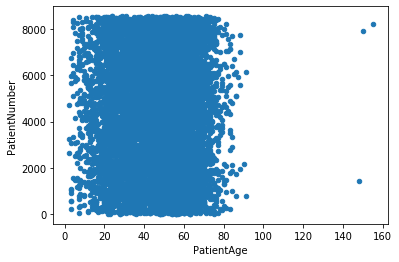

In [0]:
only_age.plot(x ='PatientAge', y='PatientNumber', kind = 'scatter')  ###3 OUTLIERS ON AGE

In [0]:
tmp = df.groupby(['Target', 'PatientAge'])['patientId'].count()
d = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = d.groupby(['Exams','Target', 'PatientAge']).count()
d2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()

In [0]:
tmp = df.groupby(['class', 'PatientAge'])['patientId'].count()
d1 = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = d1.groupby(['Exams','class', 'PatientAge']).count()
d3 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()

In [0]:
import seaborn as sns

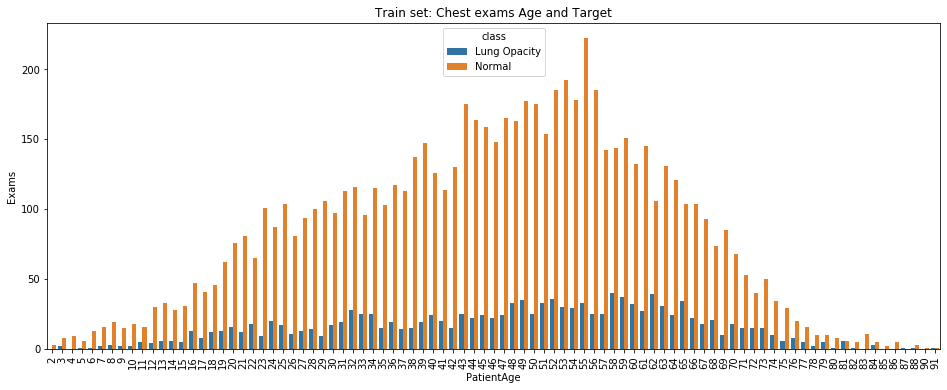

In [0]:
fig, (ax) = plt.subplots(nrows=1,figsize=(16,6))
sns.barplot(ax=ax, x = 'PatientAge', y='Exams', hue='class',data=d3)
plt.title("Train set: Chest exams Age and Target")
plt.xticks(rotation=90)
plt.show()

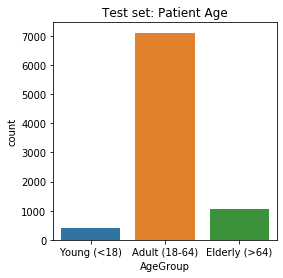

In [0]:
fig, (ax) = plt.subplots(nrows=1,figsize=(4,4))
sns.countplot(df['AgeGroup'], ax=ax, order=('Young (<18)', 'Adult (18-64)','Elderly (>64)'))
plt.title("Test set: Patient Age")
plt.xticks(rotation=0)
plt.show()

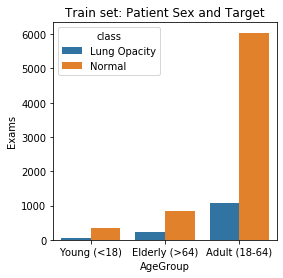

In [0]:
tmp = df.groupby(['class', 'AgeGroup'])['patientId'].count()
dd1 = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = dd1.groupby(['Exams','class', 'AgeGroup']).count()
dd2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
fig, ax = plt.subplots(nrows=1,figsize=(4,4))
sns.barplot(ax=ax, x = 'AgeGroup', y='Exams', hue='class',data=dd2)
plt.title("Train set: Patient Age Group and Target")
plt.show()

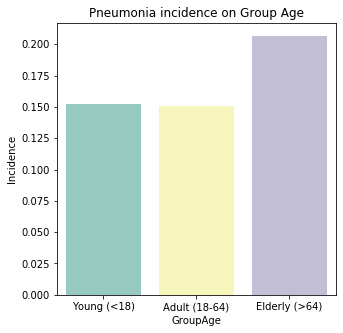

In [0]:
data = [['Young (<18)', 0.15267], ['Adult (18-64)', 0.1505], ['Elderly (>64)', 0.2066]]
  
# Create the pandas DataFrame 
t = pd.DataFrame(data, columns = ['GroupAge', 'Incidence']) 
  

fig, ax = plt.subplots(nrows=1,figsize=(5,5))
sns.barplot(ax=ax,x = 'GroupAge', y='Incidence',data=t, palette='Set3',order=('Young (<18)', 'Adult (18-64)','Elderly (>64)'))
plt.title("Pneumonia incidence on Group Age")
plt.show()

In [0]:
60/(333+60)

0.15267175572519084

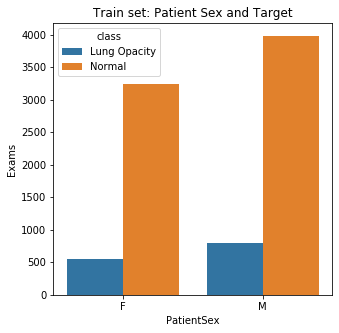

In [0]:
tmp = df.groupby(['class', 'PatientSex'])['patientId'].count()
dd1 = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = dd1.groupby(['Exams','class', 'PatientSex']).count()
dd2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
fig, ax = plt.subplots(nrows=1,figsize=(5,5))
sns.barplot(ax=ax, x = 'PatientSex', y='Exams', hue='class',data=dd2)
plt.title("Train set: Patient Sex and Target")
plt.show()

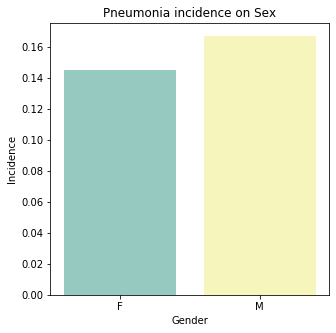

In [0]:
data = [['F', 550/(550+3233)], ['M', 798/(798+3978)]]
  
# Create the pandas DataFrame 
t = pd.DataFrame(data, columns = ['Gender', 'Incidence']) 
  

fig, ax = plt.subplots(nrows=1,figsize=(5,5))
sns.barplot(ax=ax,x = 'Gender', y='Incidence',data=t, palette='Set3')
plt.title("Pneumonia incidence on Sex")
plt.show()

In [0]:
550/(550+3233)

0.14538725878932066

In [0]:
798/(3978+798)

0.1670854271356784

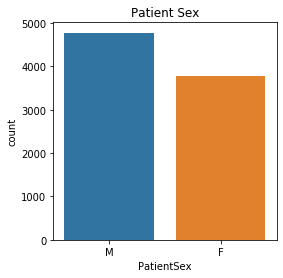

In [0]:
fig, (ax) = plt.subplots(nrows=1,figsize=(4,4))
sns.countplot(df['PatientSex'], ax=ax)
plt.title("Patient Sex")
plt.xticks(rotation=0)
plt.show()

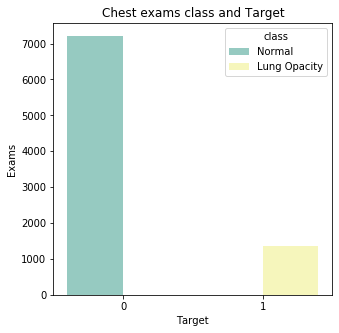

In [0]:
fig, ax = plt.subplots(nrows=1,figsize=(5,5))
tmp = df.groupby('Target')['class'].value_counts()
dff = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=dff, palette='Set3')
plt.title("Chest exams class and Target")

plt.show()

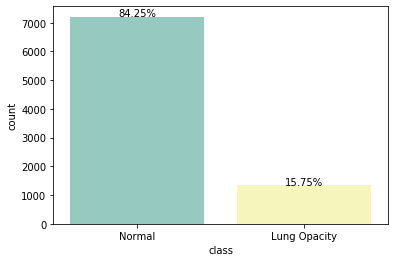

In [0]:
#DATASET XP1' RATIO between healthy and pneumonia cases

f, ax = plt.subplots(1,1, figsize=(6,4))
total = float(len(df))
sns.countplot(df['class'],order = df['class'].value_counts().index, palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 
plt.show()

In [0]:
###INITIAL DATASET ANALYSIS###
#there is 7211 for Normal class: missed the 3 age outliers

,Target,class,Exams
0,0,Normal,7211
1,1,Lung Opacity,1348


In [0]:
data = [[0,20672], [1, 9555]]
  
# Create the pandas DataFrame 
t = pd.DataFrame(data, columns = ['Target', 'Exams']) 
  
# print dataframe. 
t

,Target,Exams
0,0,20672
1,1,9555


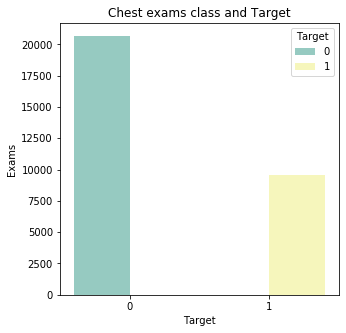

In [0]:
fig, ax = plt.subplots(nrows=1,figsize=(5,5))
sns.barplot(ax=ax,x = 'Target', y='Exams',data=t,hue='Target', palette='Set3')
plt.title("Chest exams class and Target")
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


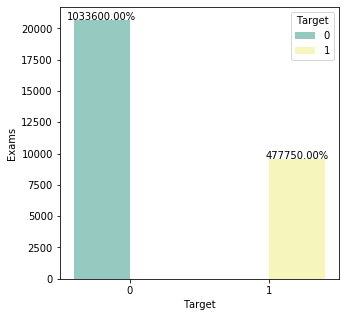

In [0]:
fig, ax = plt.subplots(nrows=1,figsize=(5,5))
total = float(len(t))
sns.barplot(ax=ax,x = 'Target', y='Exams',data=t,hue='Target', palette='Set3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 
plt.show()

In [0]:
height

9555.0

In [0]:
!pip install pydicom

     |████████████████████████████████| 7.1MB 2.8MB/s 


In [0]:
import pydicom as pd

ds = pd.dcmread('/content/drive/My Drive/identify_pneumonia-master/Example_xray_dicom/ec3697bd-184e-44ba-9688-ff8d5fbf9bbc.dcm')

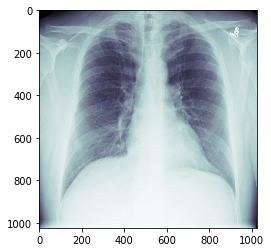

In [0]:
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

In [0]:
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.7426.1517874331.537186
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: 'ec3697bd-184e-44ba-9688-ff8d5fbf9bbc'
(0010, 0020) Patient ID                          LO: 'ec3697bd-184e-44ba-9688-ff8d5fbf9bbc'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's

In [0]:
path='/content/drive/My Drive/identify_pneumonia-master/Examples_xray/'
f, ax = plt.subplots(3,3, figsize=(5,5))
for x in path:
  print(x)


In [0]:
import cv2
img = cv2.imread('/content/drive/My Drive/identify_pneumonia-master/Examples_xray/00aecb01-a116-45a2-956c-08d2fa55433f.jpeg')

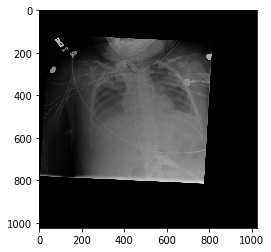

In [0]:
plt.imshow(img, cmap=plt.cm.bone) 

In [0]:
def show_dicom_images(path):
    f, ax = plt.subplots(3,3, figsize=(8,8))
    imagePath = path
    i=0
    for filename in os.listdir(imagePath):
      image_name=filename.split('.jpeg')
      image_name=image_name[0]
      df=training_dataframe2
      new_df=df.loc[df['patientId']==image_name]
      patientid=new_df['patientId'].values
      modality=new_df['Modality'].values
      sex=new_df['PatientSex'].values
      age=new_df['PatientAge'].values
      classs=new_df['class'].values
      target=new_df['Target'].values
      
      data_row_img= cv2.imread(imagePath+ '/' +filename)
      ax[i//3, i%3].imshow(data_row_img, cmap='inferno') 
      ax[i//3, i%3].axis('off')
      ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass:'.format(
              patientid,
              modality, age, sex, target, classs))
      i+=1

     


In [0]:
show_dicom_images('/content/drive/My Drive/identify_pneumonia-master/Examples_xray/')

NameError: ignored

In [0]:
import pydicom as pd

def show_dicom_images(path):
    f, ax = plt.subplots(3,3, figsize=(10,10))
    imagePath = path
    i=0
    for filename in os.listdir(imagePath):
      image_name=filename.split('.dcm')
      image_name=image_name[0]
      df=training_dataframe2
      new_df=df.loc[df['patientId']==image_name]
      patientid=new_df['patientId'].values
      modality=new_df['Modality'].values
      sex=new_df['PatientSex'].values
      age=new_df['PatientAge'].values
      classs=new_df['class'].values
      target=new_df['Target'].values
      viewp=new_df['ViewPosition'].values
      print(classs[0])

      data_row_img = pd.dcmread(imagePath+ '/' +filename)
      ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
      ax[i//3, i%3].axis('off')
      ax[i//3, i%3].set_title('ID: {} \nAge: {} Viewposition: {} \n Class: {} \n Label: {}'.format(
              patientid[0], age[0], viewp[0], classs[0], target[0]), size=7)
      i+=1
    plt.show()

No Lung Opacity / Not Normal
Normal
No Lung Opacity / Not Normal
Normal
Lung Opacity
Normal
Lung Opacity
Lung Opacity
No Lung Opacity / Not Normal
Lung Opacity


IndexError: ignored

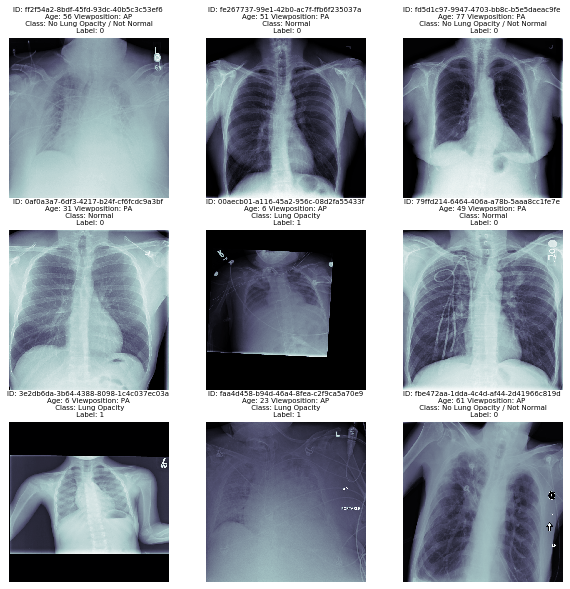

In [0]:
show_dicom_images('/content/drive/My Drive/identify_pneumonia-master/Example_xray_dicom/')